In [5]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

!chmod 600 /content/kaggle.json


!kaggle datasets download -d vaibhavsxn/google-stock-prices-training-and-test-data
!unzip google-stock-prices-training-and-test-data.zip -d /content/

google-stock-prices-training-and-test-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  google-stock-prices-training-and-test-data.zip
replace /content/Google_Stock_Price_Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/Google_Stock_Price_Test.csv  
  inflating: /content/Google_Stock_Price_Train.csv  


## Part 1: Informações do Conjunto de dados

 <b>Conjunto de dados de preços de ações do Google:</b> os dados contêm as informações do preço de ações do Google de 2012 a 2016, com 1258 números de observação e 6 números de atributos.  Os atributos são `Date`, `Open`, `High`, `Low`, `Close` e ​​`Volume`.

###  1.1:  Importar bibliotecas e dataset


**numpy** - Manipulação de array multidimensional

**pandas** - Manipulação de conjunto de dados

**matplotlib** & **seaborn** - Plotar gráficos



In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Nesta etapa, importamos o conjunto de dados para isso usamos a biblioteca pandas.

In [7]:
training_set = pd.read_csv('Google_Stock_Price_Train.csv')
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


###  1.2: Informação e visualização de dados

In [8]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


print(training_set.shape)
print(test_set.shape)

(1258, 6)
(20, 6)


#### Data Information

In [9]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


#### Visualize a Distribuição de Dados

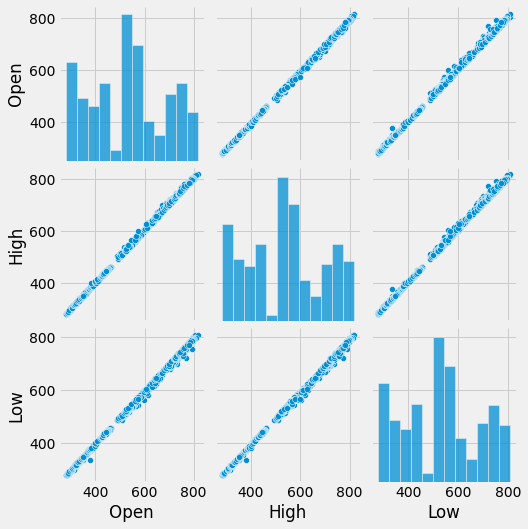

In [10]:
plt.style.use('fivethirtyeight')
sns.pairplot(training_set)

## Part 2: Data Preprocessing 

### 2.1: Valores Faltantes

In [11]:
training_set.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [12]:
test_set.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

###  2.2: Acesse o Coluna de Preço de Ações Abertas

Pegar apenas a previsão do preço das ações do Google, que é o preço das ações do Google aberto que queremos prever.

In [13]:
training_set = training_set.iloc[:,1:2].values
test_set = test_set.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### 2.3: Feature Scaling 

O Feature Scaling é a parte mais importante do pré-processamento de dados. Se virmos nosso conjunto de dados, algum atributo contém informações em valor numérico, alguns valores muito altos e alguns muito baixos. Isso causará alguns problemas em nosso modelo. Para resolver esse problema, definimos todos os valores na mesma escala, existem dois métodos para resolver esse problema, o primeiro é Normalizar e o segundo é o Standard Scaler.


![img](https://i.ibb.co/jZYLyF6/1-wu-CX1bj-Sh6-YXcu8tu-A5wyw.png)

Aqui usamos Normalize Scalar porque no Google Stock Price Prediction construímos o modelo LSTM que tem várias funções sigmoid (que é 0 ou 1) e é por isso que escolhemos Normalize Scalar aqui.

In [14]:
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### 2.4: Obtendo a entrada e saída

In [15]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

### 2.5: Reshaping o Input

Nesta etapa, reshape nossa entrada. Porque nossa forma de entrada tem 2 dimensões **uma dimensão corresponde à observação** e **a segunda corresponde as features que tem apenas uma features aqui** e nós convertemos nossa **entrada em três dimensões** o último 1 corresponde a um timestamp de data e hora porque nossa entrada é **t** e a saída é **t+1**.  Então **t+1-t= 1** é por isso que 1 aqui.  

Então aqui 1257 é as amostrars, 1 é o timestamp, 1 é feature scaling.

In [16]:
print(f"Antes Rehshape {X_train.shape}")
X_train = np.reshape(X_train, (1257, 1, 1))
print(f"Depois Rehshape {X_train.shape}")

Antes Rehshape (1257, 1)
Depois Rehshape (1257, 1, 1)


## Part 3: Modelo

###  3.1: Bibliotecas para Modelo

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

### 3.2: LSTM

In [18]:
model = Sequential()
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (1, 1)))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
model.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
40/40 [==============================] - 4s 5ms/step - loss: 0.0952
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0825
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0794
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0773
Epoch 5/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0752
Epoch 6/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0731
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0710
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0687
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0666
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0644
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0622
Epoch 12/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0600
Epoch 13/200
40/40 [=================

##  Part 4: Fazer uma previsão e visualizar o resultado

 ### 4.1:Obtendo previsão e visualização (Test Set)

#### Prediction

In [20]:
real_stock_price = test_set
inputs = real_stock_price
inputs = sc.transform(test_set)                   # feature scaling
inputs = np.reshape(inputs, (20, 1, 1))           # reshape as amostras
predicted_stock_price = model.predict(inputs)     # prediction

1/1 [==============================] - 0s 155ms/step


#### <font color = blue> Visualization

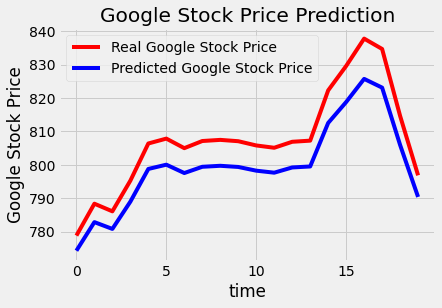

In [21]:
# inversa à escala original
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualizacao dos resultados
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()

### 4.2: Obtendo previsão e visualização (Training Set)

#### Prediction

In [22]:
training_set = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = training_set.iloc[:, 1:2].values

real_stock_price = training_set
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (1258, 1, 1))
predicted_stock_price = model.predict(inputs)

40/40 [==============================] - 0s 2ms/step


#### Visualização

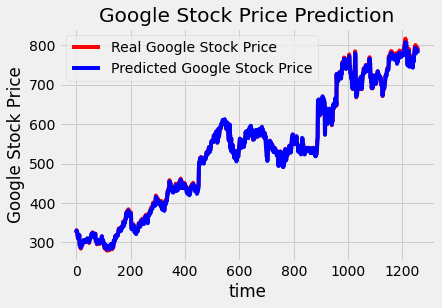

In [23]:
# inversa à escala original
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualizacao dos resultados 
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()